# ML Module Exam
- Roll no: 220940325081

## Problem Statement 2: For Question2 either use read_csv if file is csv ....if file is excel then use read_excel
Chandrashekhar wants to purchase office-space. He does a detailed survey of the offices and corporate complexes in the area, and tries to quantify a lot of factors, such as the distance of the offices from residential and other commercial areas, schools and workplaces; the reputation of the construction companies and builders involved in constructing the apartments; the distance of the offices from highways, freeways and important roads; the facilities around the office space and so on.

Each of these factors are quantified, normalized and mapped to values on a scale of 0 to 1. Chandrashekhar then makes a table. Each row in the table corresponds to Chandrashekhar Observations for a particular house. If Chandrashekhar has observed and noted F features, the row contains F values separated by a single space, followed by the office-space price in dollars/square-foot. If Chandrashekhar makes observations for H houses, his observation table has (F+1) columns and H rows, and a total of (F+1) * H entries.

Chandrashekhar does several such surveys and provides you with the tabulated data. At the end of these tables are some rows which have just F columns (the price per square foot is missing). Your task is to predict these prices. F can be any integer number between 1 and 5, both inclusive.
There is one important observation which Chandrashekhar has made.
The prices per square foot, are (approximately) a polynomial function of the features in the observation table. This polynomial always has an order less than 4


In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset

df=pd.read_excel(r'D:\cdac assignments\Machine Learning\ML Module Exam\data_final.xlsx')
df

,observation,feature,price
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88
...,...,...,...
95,0.99,0.13,636.22
96,0.28,0.46,272.12
97,0.87,0.36,696.65
98,0.23,0.87,434.53


In [3]:
# Checking the shape of dataset 

df.shape

# There are 100 rows and 2 columns

(100, 3)

In [4]:
# Checking the information about the datatype of features of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   observation  100 non-null    float64
 1   feature      100 non-null    float64
 2   price        100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [5]:
# Checking if the null values are present
df.isnull().any()

observation    False
feature        False
price          False
dtype: bool

In [6]:
# Checking if duplicates are present

df.duplicated().any()

False

- Hence our dataset is clean and ready to work upon

# Model Building

In [7]:
# Creating Dependent and Independent variables
y=df['price']

x=df.drop('price',axis=1)

In [29]:
x.shape

(100, 2)

In [30]:
y.shape

(100,)

In [31]:
x.size

200

In [32]:
y.size

100

- Applying Linear regression first

In [8]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

LinearRegression()

- Applying polynomial features to model

In [49]:
from sklearn.preprocessing import PolynomialFeatures
reg=PolynomialFeatures(degree=2)
poly=reg.fit_transform(x)

model1=LinearRegression()
model1.fit(poly,y)

LinearRegression()

- Checking the coefficient and intercept of the model

In [50]:
model1.coef_

array([  0.        , -34.06132993,  24.17060676, 491.31751827,
       792.81418927, 209.69630917])

In [51]:
model1.intercept_

75.8432033952256

In [52]:
model1.score

<bound method RegressorMixin.score of LinearRegression()>

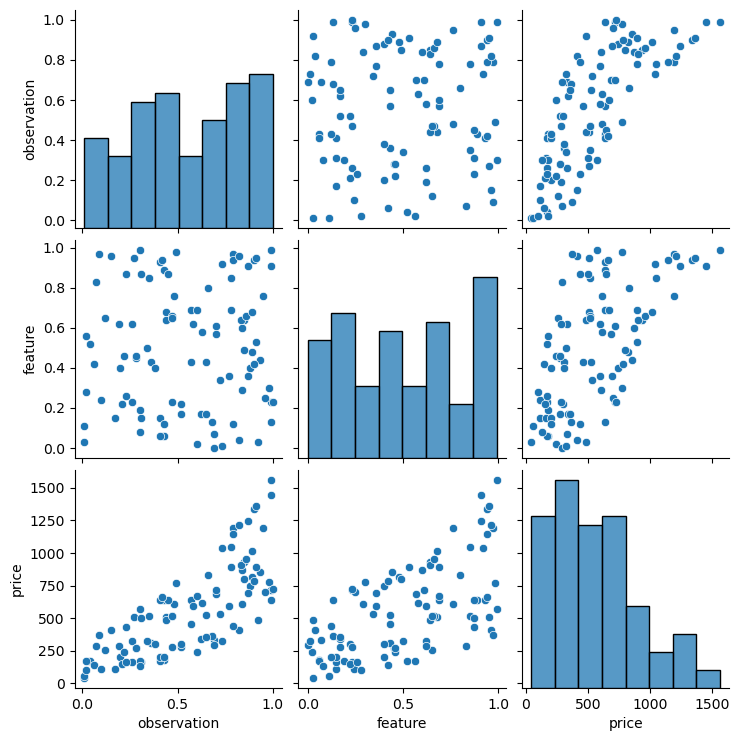

In [53]:
sns.pairplot(df)

<module 'matplotlib.pyplot' from 'C:\\Users\\sumit\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

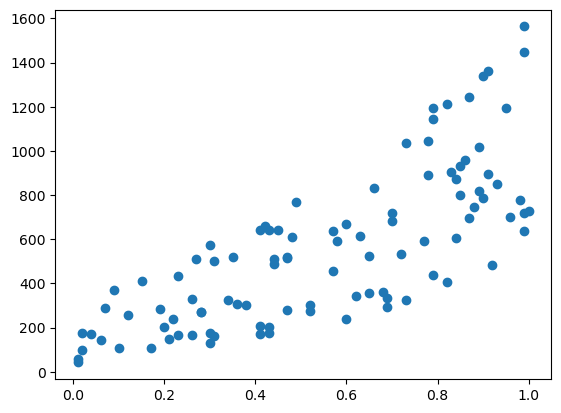

In [54]:
plt.scatter(x['observation'],y)
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\sumit\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

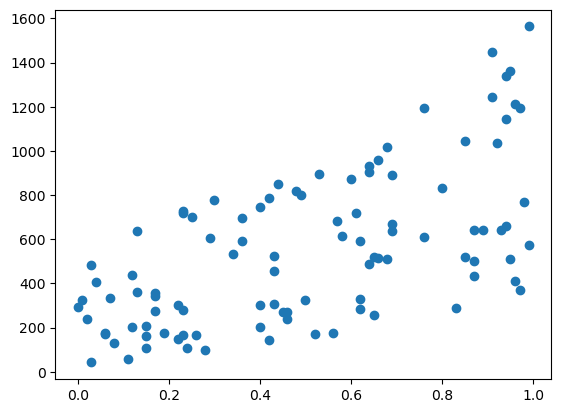

In [60]:
plt.scatter(x['feature'],y)
plt